Import some prerequisites

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import math

Run this cell for plotting

In [22]:
def plotter(img_list, r, w, gray, wr, hr, fig_name = None):
    '''
    Plots images' list with its' caption and saves result image if you want.

    Parameters:
        img_list (list): The list of tuples of image and its' caption.
        r (int): The number of row(s).
        w (int): The number of colunm(s).
        gray (bool): The flag for plotting images in grayscale mode.
        wr (int): The width of one figure.
        hr (int): The height of one figure.
        fig_name (str): The name of the image of the plot. if not set this parameter the plot doesn't save.
    '''

    plt.rcParams['figure.figsize'] = (wr, hr)
    for i in range(len(img_list)):
        plt.subplot(r, w, i + 1)
        if img_list[i][2] == 'img':
            if gray:
                plt.imshow(img_list[i][0], cmap = 'gray')
            else:
                plt.imshow(img_list[i][0])
            plt.xticks([])
            plt.yticks([])
        elif img_list[i][2] == 'hist':
            plt.bar(np.arange(len(img_list[i][0])), img_list[i][0], color = 'c')
        else:
            raise Exception("Only image or histogram. Use third parameter of tuples in img_list and set it to img or hist.")
        plt.title(img_list[i][1])
    if fig_name is not None:
        plt.savefig(fig_name + '.png')
    plt.show()

Run this cell for change polar to cartesian.

In [23]:
def pol_to_car(rho, theta):
    '''
    Changes rho and theta of a line to two point of that line.

    Parameters:
        rho (float): The distance from the origin to the line.
        theta (float):  Angle from origin to the line.

    Returns:
        (tuple): tuple of two point of line.
    '''

    a = np.cos(theta)
    b = np.sin(theta)
    c = 1000
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + c * (-b))
    y1 = int(y0 + c * (a))
    x2 = int(x0 - c * (-b))
    y2 = int(y0 - c * (a))
    return x1, y1, x2, y2

# part b


Implement this function to detect and remove circles in the given image.

In [24]:
def remove_circles(image):
    '''
    Returns the image which circles have been removed.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here
    # Convert to grayscale
    gray = cv2.cvtColor(out_img, cv2.COLOR_BGR2GRAY)

    # Apply Hough Transform to find circles
    circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT, dp=1.2, minDist=100, param1=90, param2=40, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.round(circles[0, :]).astype("int")
        for (x, y, r) in circles:
            # Draw the circle in the output image
            cv2.circle(out_img, (x, y), r+2, (0, 0, 0), -1)

    return out_img

Test your implementation (dont change this cell)

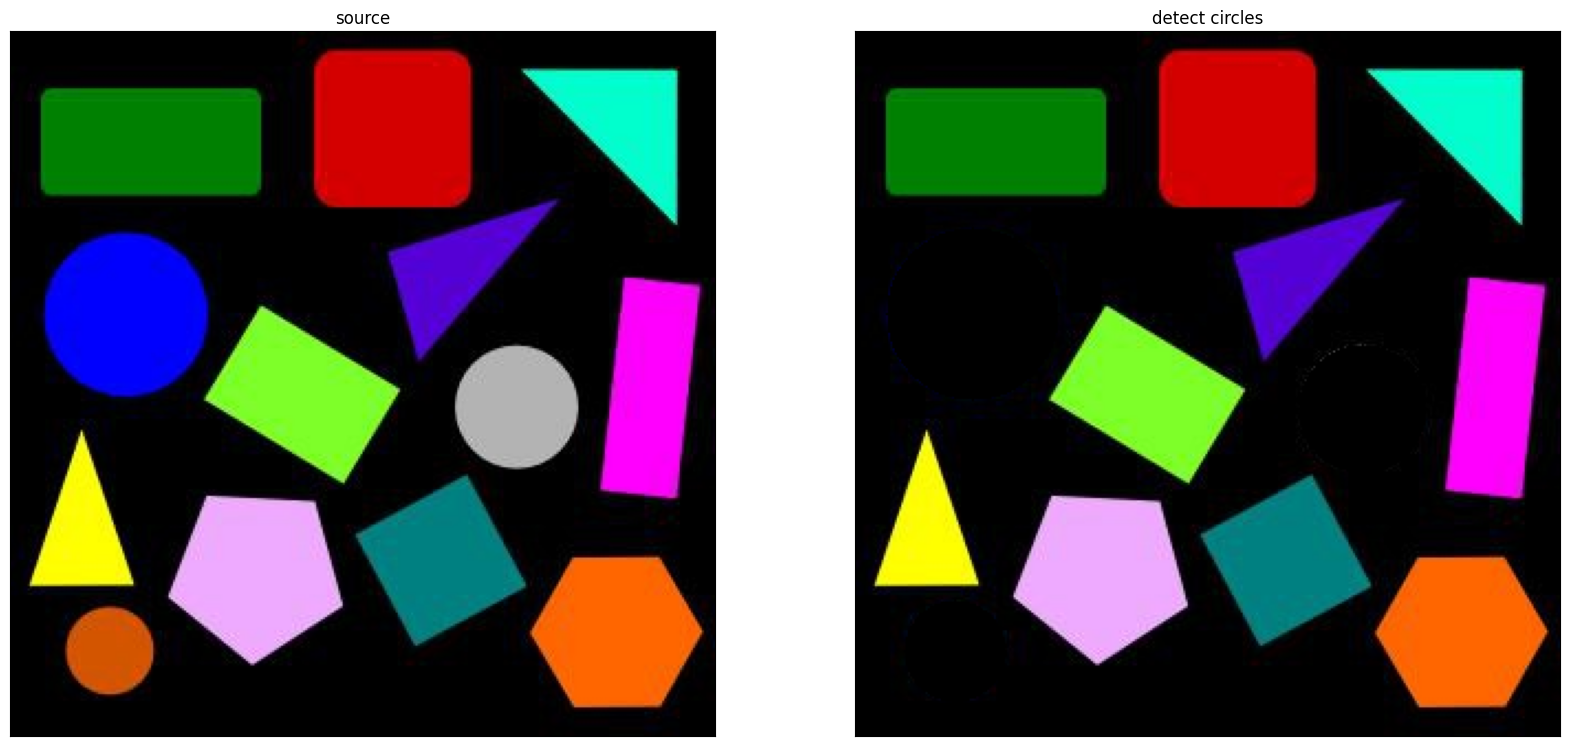

In [25]:
image_list = []

# image = cv2.imread(os.path.join('images', '1.png'))
image = cv2.imread("/content/1.jpg")
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img = remove_circles(image)

image_list.append([cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB), 'detect circles', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4a')

# part c

Implement this function to detect lines in the given image with hough algorithm.

In [26]:
def detect_lines_hough(image):
    '''
    Returns the image which lines have been detected.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image.
    '''
    out_img = image.copy()

    #Writer your code here
    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply edge detection using Canny
    edges = cv2.Canny(blurred, 30, 90)  # Adjust these values as needed

    # Use HoughLinesP to detect lines
    lines = cv2.HoughLinesP(edges, 1, np.pi/180, threshold=7, minLineLength=12, maxLineGap=10)  # Adjusted for sensitivity

    # Draw lines on the output image
    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            cv2.line(out_img, (x1, y1), (x2, y2), (255, 255, 255), 2)
    return out_img

Test your implementation (dont change this cell)

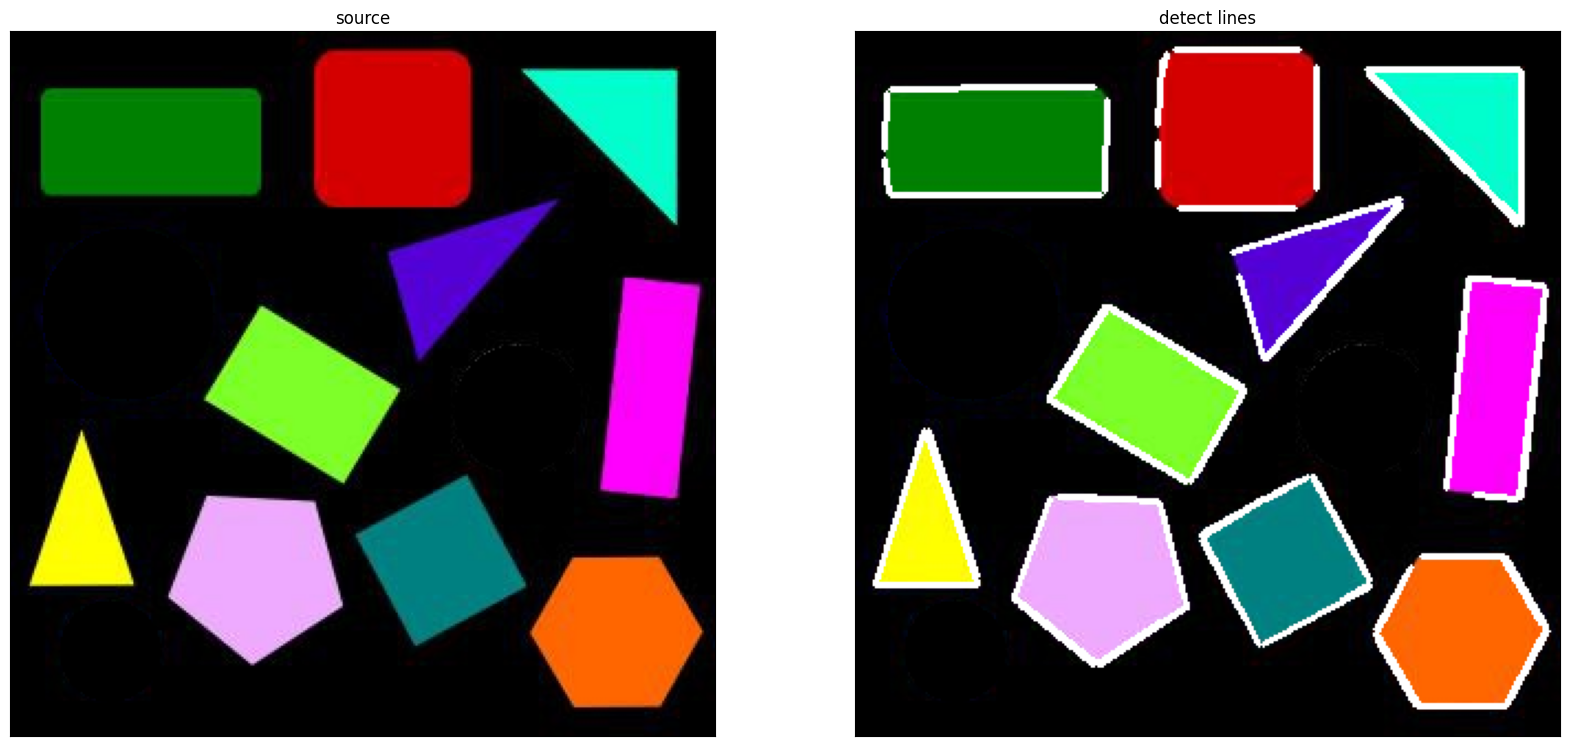

In [27]:
image_list = []

# image = cv2.imread(os.path.join('images', '1b.png'))
image = out_img
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img1 = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img1, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# ***C+***

In [58]:
import cv2
import numpy as np

def detect_lines_hough(image):
    '''
    Returns the image on which lines have been detected using the standard Hough Transform.

    Parameters:
        image (numpy.ndarray): The input image.

    Returns:
        out_img (numpy.ndarray): The result image with detected lines.
    '''
    out_img = image.copy()

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise and improve edge detection
    # blurred = cv2.GaussianBlur(gray, (5, 5), 0)

    # Apply edge detection using Canny
    edges = cv2.Canny(gray, 75, 200)  # Adjust these threshold values as needed

    # Use HoughLines to detect lines
    lines = cv2.HoughLines(edges, 1, np.pi/180, 55)  # rho and theta resolutions and threshold

    # Draw lines on the output image
    if lines is not None:
        for rho, theta in lines[:,0]:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a * rho
            y0 = b * rho
            x1 = int(x0 + 1000 * (-b))
            y1 = int(y0 + 1000 * (a))
            x2 = int(x0 - 1000 * (-b))
            y2 = int(y0 - 1000 * (a))
            cv2.line(out_img, (x1, y1), (x2, y2), (0, 255, 0), 2)

    return out_img


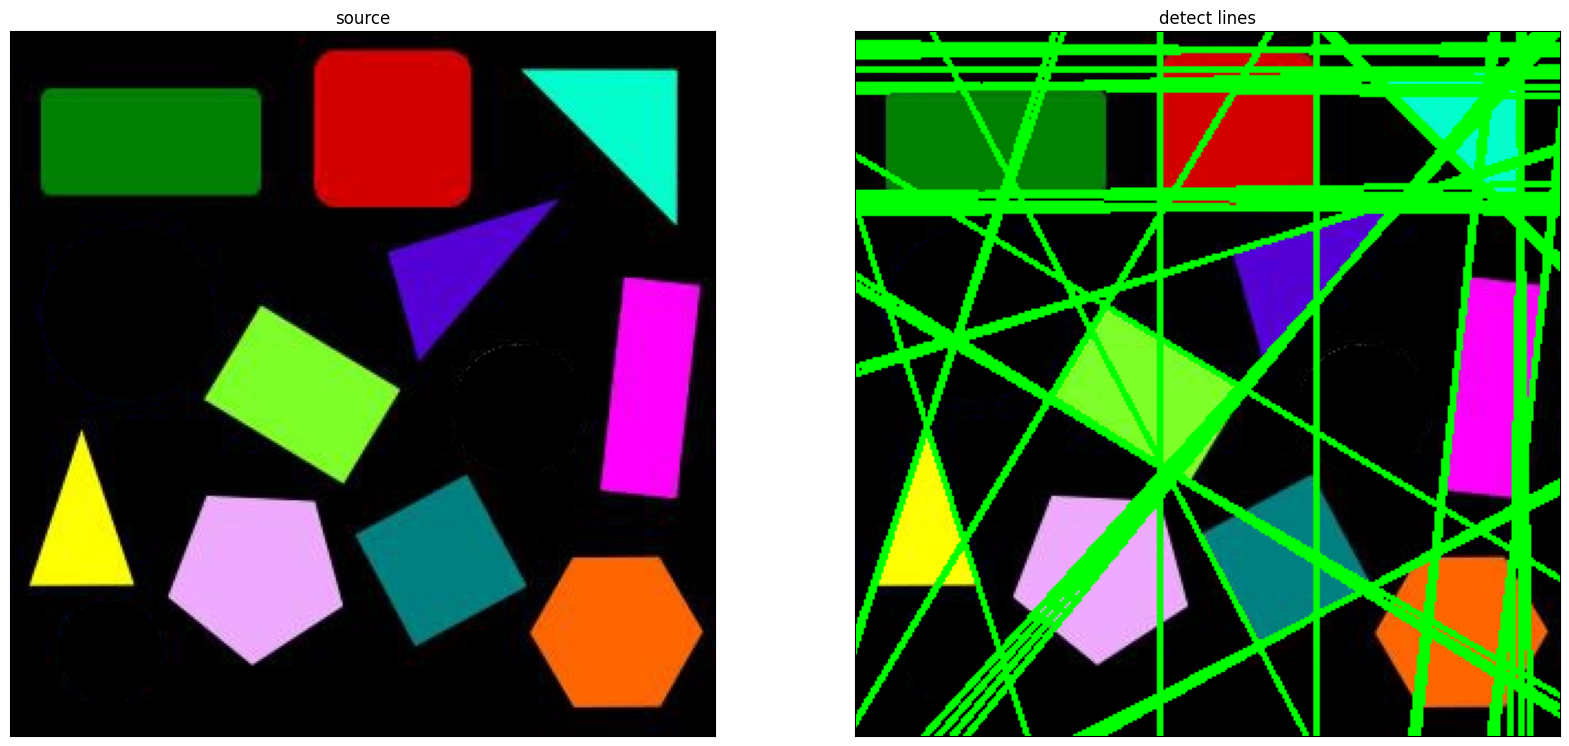

In [59]:
image_list = []

# image = cv2.imread(os.path.join('images', '1b.png'))
image = out_img
image_list.append([cv2.cvtColor(image, cv2.COLOR_BGR2RGB), 'source', 'img'])

out_img2 = detect_lines_hough(image)

image_list.append([cv2.cvtColor(out_img2, cv2.COLOR_BGR2RGB), 'detect lines', 'img'])

plotter(image_list, 1, 2, True, 20, 10, 'q4b')

# part d

In [17]:
def detect_shape(image_path):
    # Load the image
    image = cv2.imread(image_path)

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Canny edge detection
    edges = cv2.Canny(gray, 50, 150,L2gradient=True)

    # Find contours in the image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for cnt in contours:
        # Get approximate polygon
        epsilon = 0.02 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)

        # Draw the approximate polygon on the image
        cv2.drawContours(image, [approx], 0, (0, 255, 0), 2)

        # Classify the shape based on the number of vertices in the polygon
        if len(approx) == 3:
            shape = "Triangle"
        elif len(approx) == 4:
            shape = "Rectangle"
        elif len(approx) == 5:
            shape = "Pentagon"
        else:
            shape = "Circle"

        # Draw the shape name on the image
        cv2.putText(image, shape, (approx.ravel()[0], approx.ravel()[1]), cv2.FONT_HERSHEY_SIMPLEX, .4, (160,32,240), 2)

    # Save the output image
    cv2.imwrite("output.jpg", image)

# Call the function to detect shapes in the image
detect_shape("7.jpg")